In [1]:
import numpy as np
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt

# Homework 4

## Problem 0

In [2]:
t = np.linspace(0, np.pi * 100, int(1e5))
N = 10 + np.sin(t)
bkgd = stats.norm.rvs(size=int(1e5)) * np.sqrt(N) + N

## Problem 1

### (A)

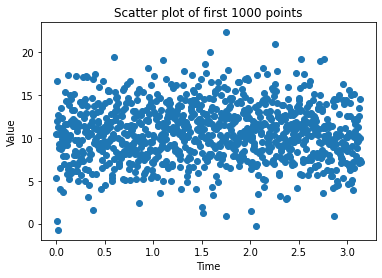

In [3]:
plt.title("Scatter plot of first 1000 points")
plt.xlabel("Time")
plt.ylabel("Value")
plt.scatter(t[0:1000], bkgd[0:1000]);

### (B)

We plot 2000 samples starting at the 500th, as suggested.

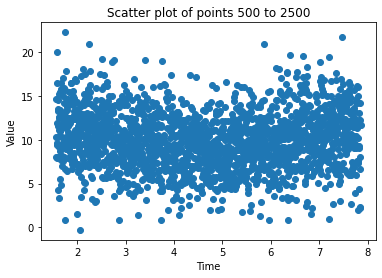

In [4]:
start=499
end=2499
plt.title("Scatter plot of points 500 to 2500")
plt.xlabel("Time")
plt.ylabel("Value")
plt.scatter(t[start:end+1], bkgd[start:end+1]);

### (C)

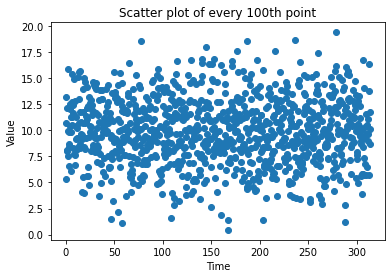

In [5]:
plt.title("Scatter plot of every 100th point")
plt.xlabel("Time")
plt.ylabel("Value")
plt.scatter(t[::100], bkgd[::100]);

## Problem 2

### (A)

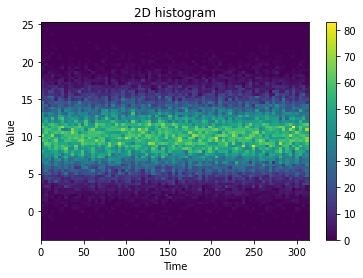

In [6]:
plt.title("2D histogram")
plt.xlabel("Time")
plt.ylabel("Value")
plt.hist2d(t, bkgd, 80)
plt.colorbar();

### (B)

We have taken the space of measurements and divided it into a 80-by-80 grid of bins, each of which is then colored based on the number of points that fell into the bin, as shown in the colorbar guide (purple and blue represent few points, green an intermediate amount, and yellow the most). In other words, this is a visual representation of how common different values of measurements are across various small time intervals. Note that although the sine wave is too high-frequency to be clear at this granularity, a degree of time-dependence is at least evident from the "striping" effect.

## Problem 3

### (A)

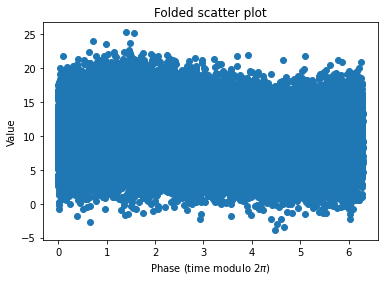

In [7]:
tfold = t % (2 * np.pi)
plt.title("Folded scatter plot")
plt.xlabel("Phase (time modulo $2\pi$)")
plt.ylabel("Value")
plt.scatter(tfold, bkgd);

### (B)

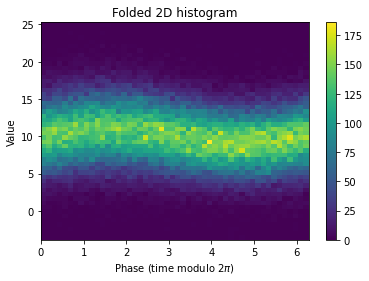

In [8]:
plt.title("Folded 2D histogram")
plt.xlabel("Phase (time modulo $2\pi$)")
plt.ylabel("Value")
plt.hist2d(tfold, bkgd, 50)
plt.colorbar();

### (C)

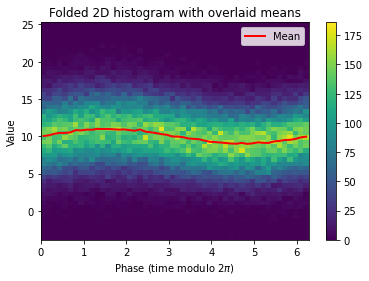

In [9]:
h, xedge, yedge, _ = plt.hist2d(t % (2 * np.pi), bkgd, 50)

# find bin centers from bin edges
x = (xedge[1:] + xedge[:-1]) / 2
y = (yedge[1:] + yedge[:-1]) / 2

means = np.sum(np.matmul(h, np.diag(y)), axis=1) / np.sum(h, axis=1)

plt.title("Folded 2D histogram with overlaid means")
plt.xlabel("Phase (time modulo $2\pi$)")
plt.ylabel("Value")
plt.plot(x, means, linewidth=2, color='r', label="Mean")
plt.legend()
plt.colorbar();